In [3]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import scipy.stats as stats
import sklearn


In [5]:
# Load dataset
file_path = "/Users/andreapena/Desktop/regression_capstone/data/train.csv"
df = pd.read_csv(file_path)

# Check out dataset.
df.set_index("Id", inplace=True)
print(df.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

In [7]:
# Feature to look at the amount of rows and columns.
df.shape

(1460, 80)

In [9]:
# Check column names
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [11]:
# Check null values
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [13]:
# Drop columns with missing values
df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
# Check summary statistics
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
# Check data feature columns, count and dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [19]:
# Check column's skewness
df['MasVnrArea'].skew()

2.669084210182863

In [51]:
# Check column's skewness
df['OverallQual'].skew()

0.2169439277628693

In [47]:
# Check column's skewness
df['GarageCars'].skew()

-0.3425489297486655

In [23]:
# Check column's skewness
df['GrLivArea'].skew()

1.3665603560164552

In [57]:
# Check column's skewness
df['GarageArea'].skew()

0.17998090674623907

In [59]:
# Check column's skewness
df['TotalBsmtSF'].skew()

1.5242545490627664

In [61]:
# Check column's skewness
df['1stFlrSF'].skew()

1.3767566220336365

In [121]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [55]:
df['OverallQual'] = df['OverallQual'].fillna(df['OverallQual'].mean())

In [49]:
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())

In [151]:
df['GrLivArea'] = df['GrLivArea'].fillna(df['GrLivArea'].median())

In [153]:
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].mean())

In [65]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())

In [67]:
df['1stFlrSF'] = df['1stFlrSF'].fillna(df['1stFlrSF'].median())

In [123]:
# Check if there are any missing values in numeric columns.
df.select_dtypes(include='number').isna().sum()


MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [71]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()
strong_corr = corr_matrix[abs(corr_matrix) > 0.5]

# Display the correlation matrix
print(strong_corr)

               MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass            1.0          NaN      NaN          NaN          NaN   
LotFrontage           NaN          1.0      NaN          NaN          NaN   
LotArea               NaN          NaN      1.0          NaN          NaN   
OverallQual           NaN          NaN      NaN     1.000000          NaN   
OverallCond           NaN          NaN      NaN          NaN          1.0   
YearBuilt             NaN          NaN      NaN     0.572323          NaN   
YearRemodAdd          NaN          NaN      NaN     0.550684          NaN   
MasVnrArea            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF1            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF2            NaN          NaN      NaN          NaN          NaN   
BsmtUnfSF             NaN          NaN      NaN          NaN          NaN   
TotalBsmtSF           NaN          NaN      NaN     0.537808          NaN   

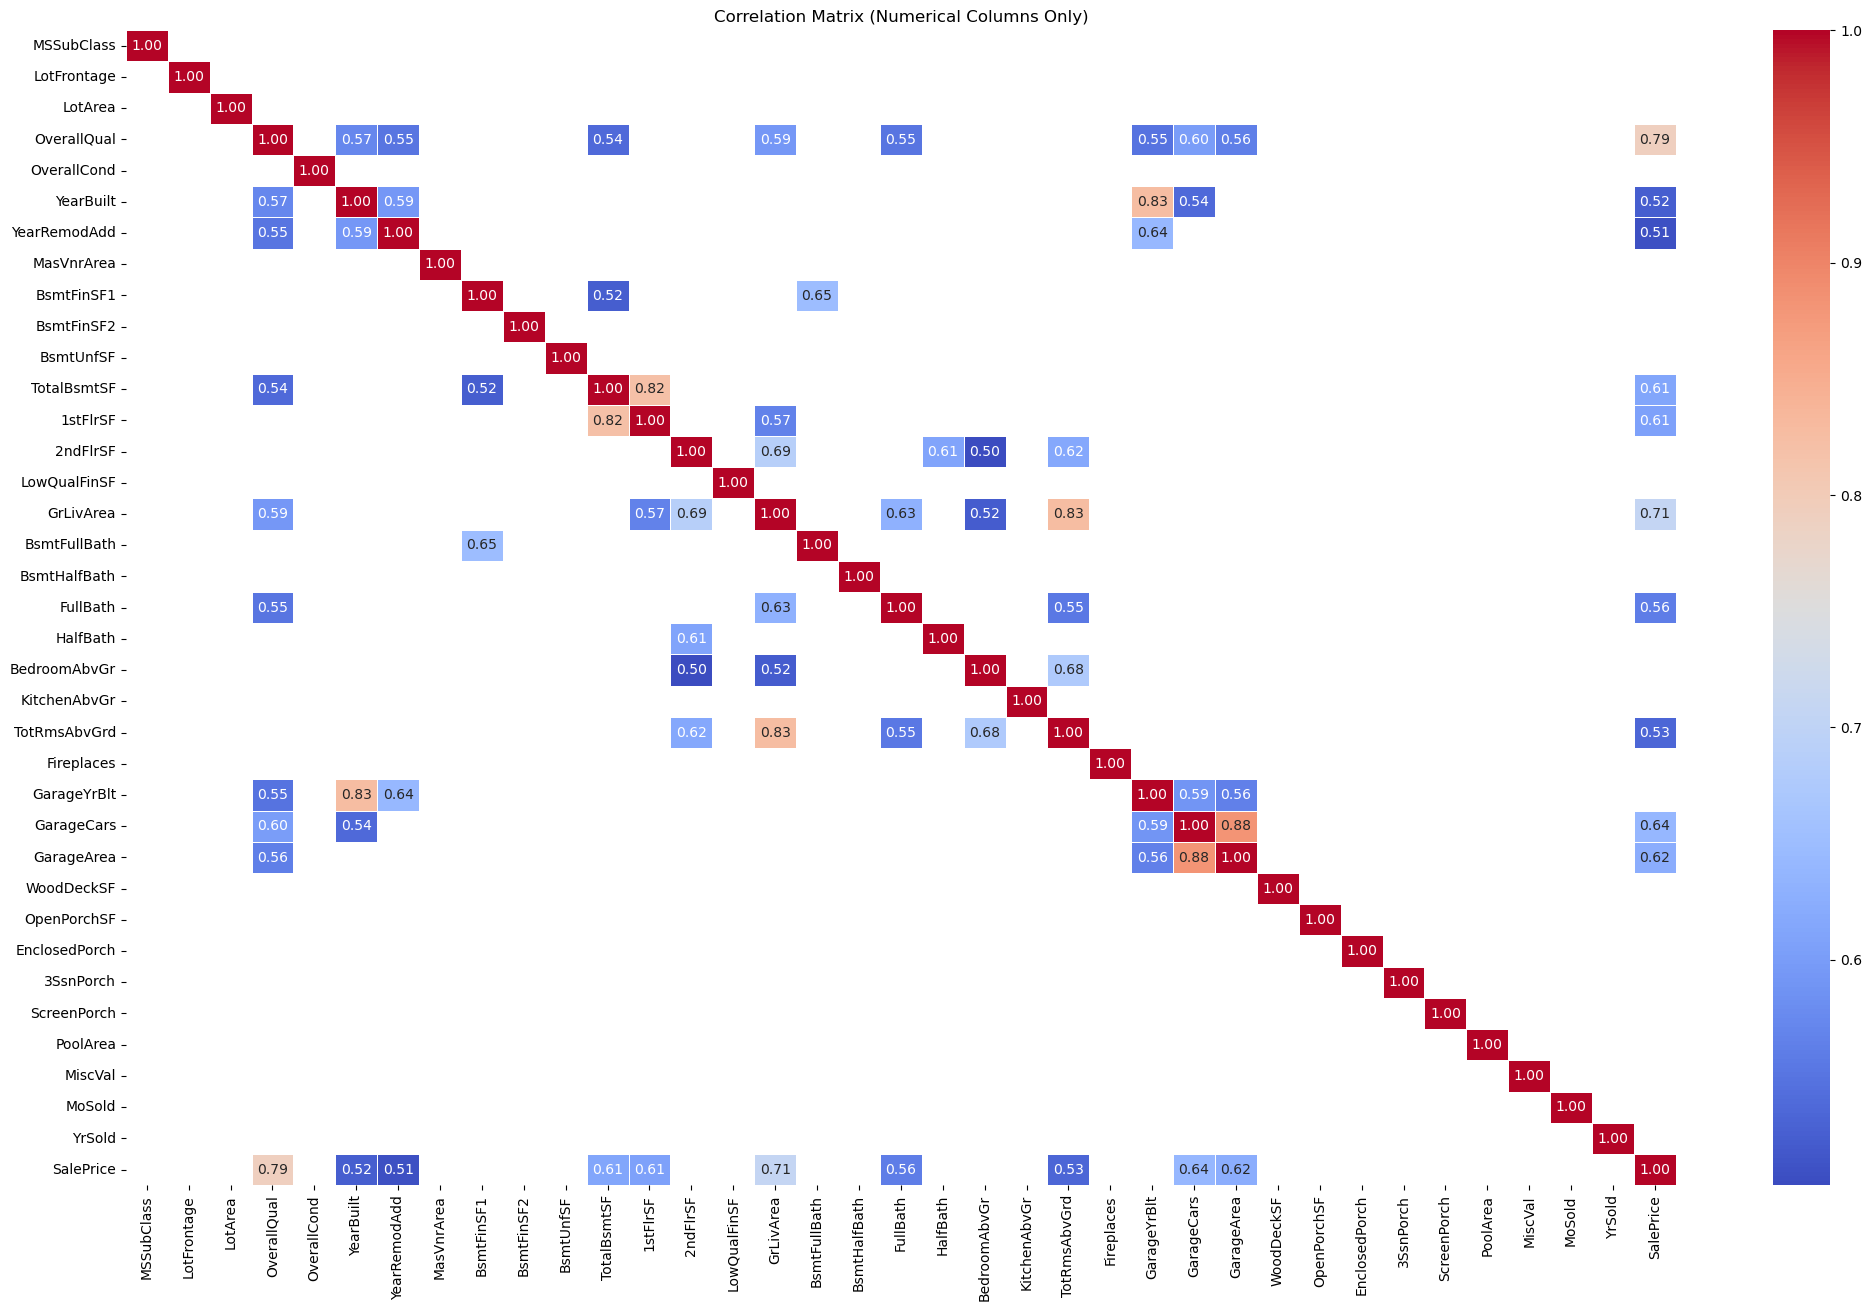

In [77]:
plt.figure(figsize=(25, 15))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numerical Columns Only)")
plt.show()

Text(0.5, 1.0, 'Relationship between Masonry Veneer Area and Sale Price')

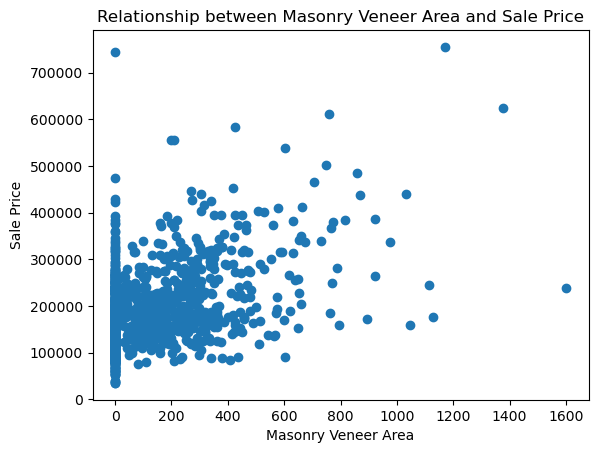

In [79]:
# Scatter plot between MasVnrArea and SalePrice
plt.scatter(df.MasVnrArea, df.SalePrice)
plt.xlabel("Masonry Veneer Area")
plt.ylabel("Sale Price")
plt.title("Relationship between Masonry Veneer Area and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Garage Cars and Sale Price')

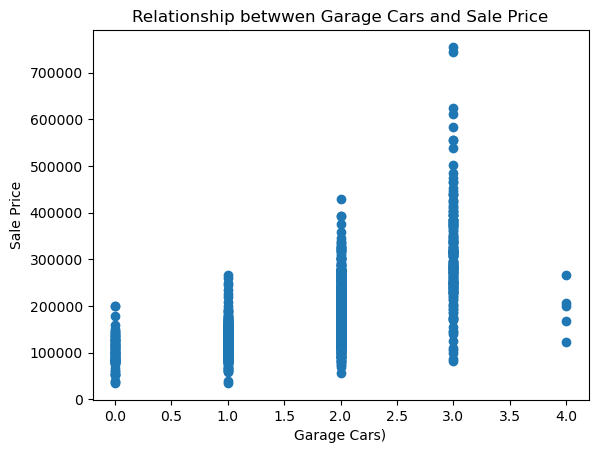

In [81]:
# Scatter plot between GarageCars and SalePrice
plt.scatter(df.GarageCars, df.SalePrice)
plt.xlabel("Garage Cars)")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Garage Cars and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen First Floor Sq Ft and Sale Price')

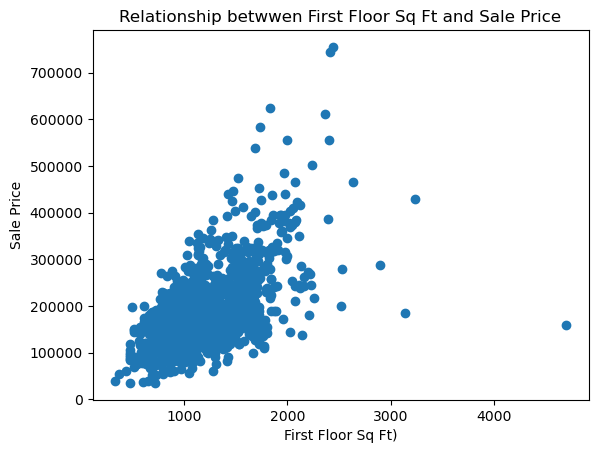

In [93]:
# Scatter plot between LotArea and SalePrice
plt.scatter(df['1stFlrSF'], df['SalePrice'])
plt.xlabel("First Floor Sq Ft)")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen First Floor Sq Ft and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Overall Condition and Sale Price')

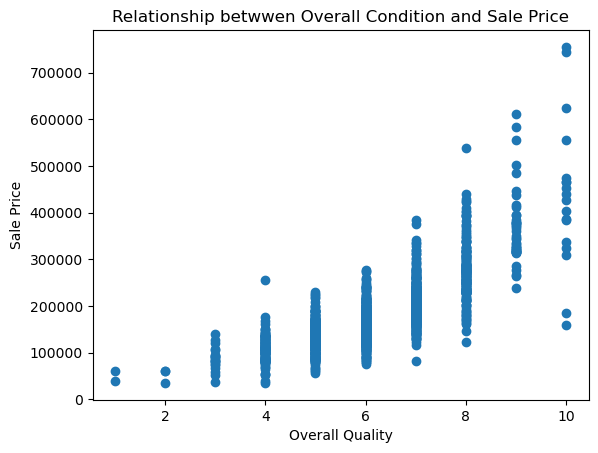

In [183]:
# Scatter plot between OverallQual and SalePrice
plt.scatter(df.OverallQual, df.SalePrice)
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Overall Quality and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Ground Living Area and Sale Price')

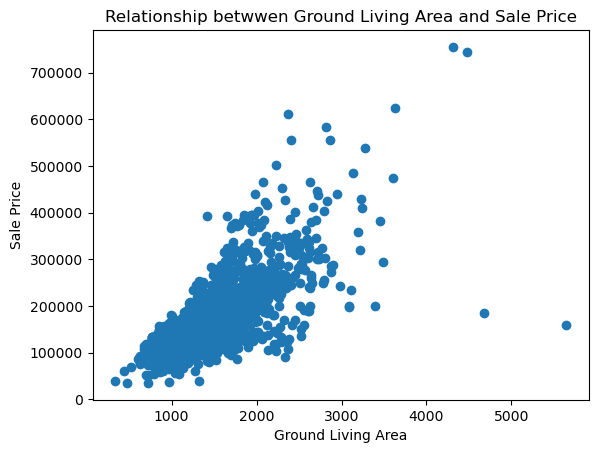

In [169]:
# Scatter plot between GrLivArea and SalePrice
plt.scatter(df.GrLivArea, df.SalePrice)
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Ground Living Area and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Full Bath and Sale Price')

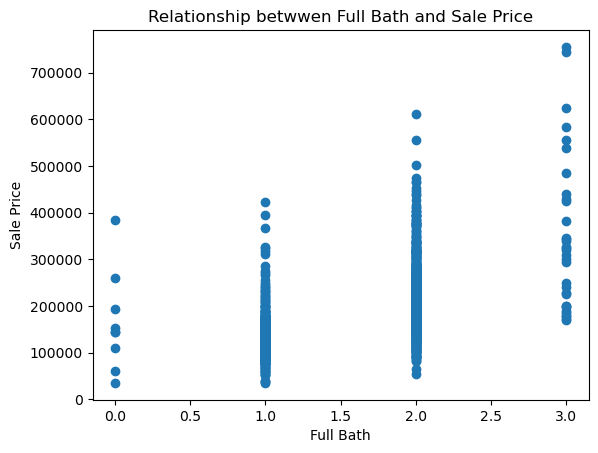

In [185]:
# Scatter plot between Full Bath and SalePrice
plt.scatter(df.FullBath, df.SalePrice)
plt.xlabel("Full Bath")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Full Bath and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Garage Area and Sale Price')

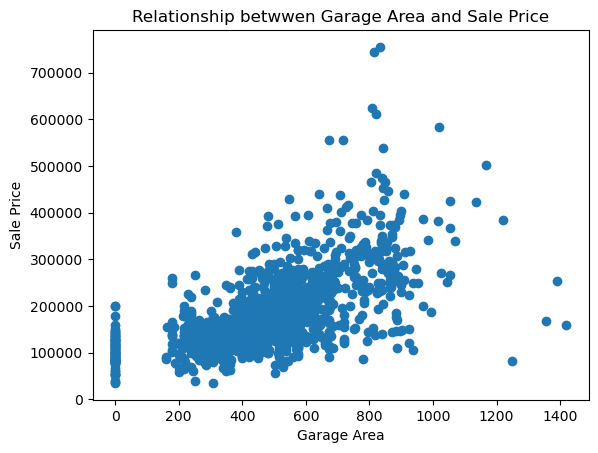

In [173]:
# Scatter plot between GarageArea and SalePrice
plt.scatter(df.GarageArea, df.SalePrice)
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Garage Area and Sale Price")

Text(0.5, 1.0, 'Relationship betwwen Total Basement Sq Ft and Sale Price')

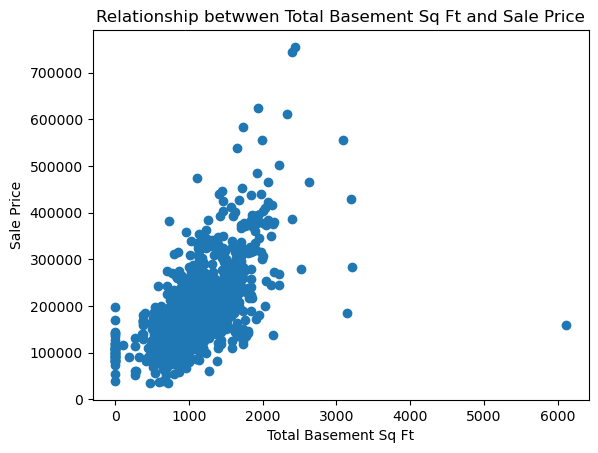

In [163]:
# Scatter plot between GarageArea and SalePrice
plt.scatter(df.TotalBsmtSF, df.SalePrice)
plt.xlabel("Total Basement Sq Ft")
plt.ylabel("Sale Price")
plt.title("Relationship betwwen Total Basement Sq Ft and Sale Price")

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

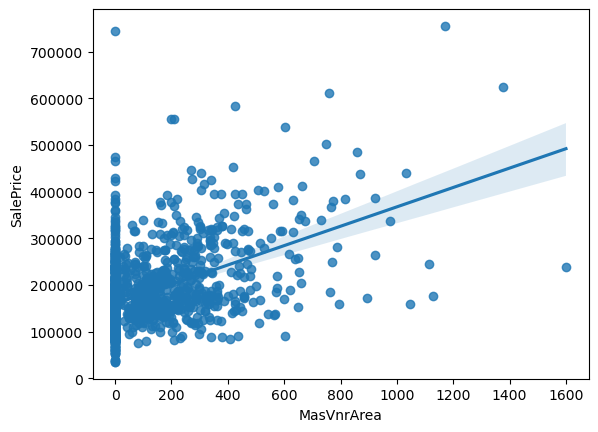

In [175]:
sns.regplot(y="SalePrice", x="MasVnrArea", data=df, fit_reg = True)

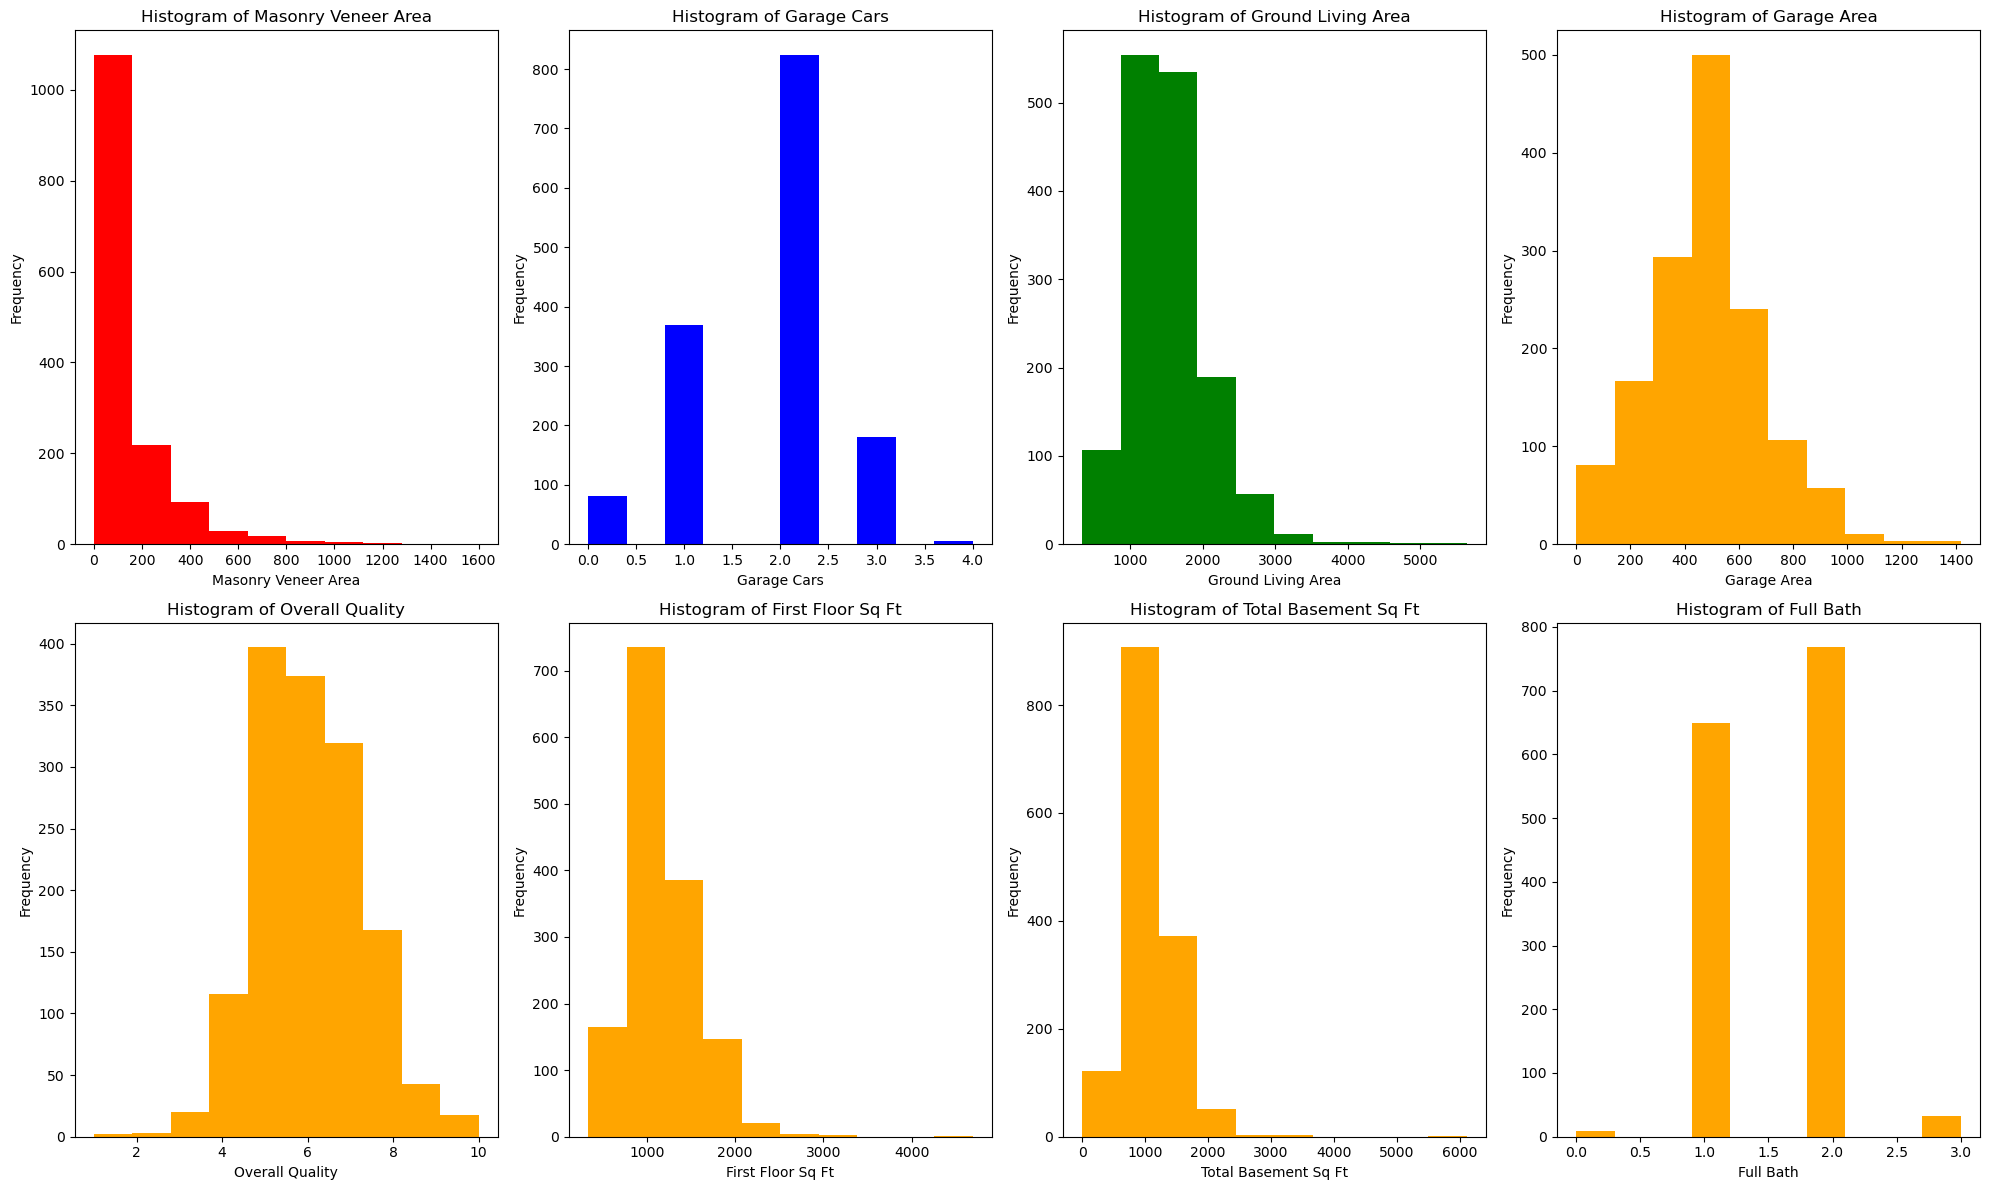

In [101]:
# Histograms of dependent variables.
plt.figure(figsize=(20, 12))
           
plt.subplot(2, 4, 1)
plt.hist(df.MasVnrArea, bins=10, color='red')
plt.xlabel('Masonry Veneer Area')
plt.ylabel('Frequency')
plt.title('Histogram of Masonry Veneer Area')

plt.subplot(2, 4, 2)
plt.hist(df.GarageCars, bins=10, color='blue')
plt.xlabel('Garage Cars')
plt.ylabel('Frequency')
plt.title('Histogram of Garage Cars')

plt.subplot(2, 4, 3)
plt.hist(df.GrLivArea, bins=10, color='green')
plt.xlabel('Ground Living Area')
plt.ylabel('Frequency')
plt.title('Histogram of Ground Living Area')

plt.subplot(2, 4, 4)
plt.hist(df.GarageArea, bins=10, color='orange')
plt.xlabel('Garage Area')
plt.ylabel('Frequency')
plt.title('Histogram of Garage Area')

plt.subplot(2, 4, 5)
plt.hist(df.OverallQual, bins=10, color='orange')
plt.xlabel('Overall Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Overall Quality')

plt.subplot(2, 4, 6)
plt.hist(df['1stFlrSF'], bins=10, color='orange')
plt.xlabel('First Floor Sq Ft')
plt.ylabel('Frequency')
plt.title('Histogram of First Floor Sq Ft')

plt.subplot(2, 4, 7)
plt.hist(df.TotalBsmtSF, bins=10, color='orange')
plt.xlabel('Total Basement Sq Ft')
plt.ylabel('Frequency')
plt.title('Histogram of Total Basement Sq Ft')

plt.subplot(2, 4, 8)
plt.hist(df.FullBath, bins=10, color='orange')
plt.xlabel('Full Bath')
plt.ylabel('Frequency')
plt.title('Histogram of Full Bath')

plt.tight_layout()
plt.show()

In [153]:
H_1 = "There is a correlation between 'Sale Price and at lease one of the inpendent variables,'MasVnrArea', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'OverallQual'."

H_0 = "None of the independent variables have a signifcant relationship with Sale Price."

In [131]:
from scipy.stats import pearsonr

# List of features
features = ['MasVnrArea', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'OverallQual']
target = 'SalePrice'

# Create a dictionary
correlation_results = {}

for feature in features:
    # Drop NaN values for this feature and target
    df_clean = df[[feature, target]].dropna()

    # Compute Pearson correlation
    x = df_clean[feature]
    y = df_clean[target]

    if len(x) > 1:  
        r, p_value = pearsonr(x, y)
        correlation_results[feature] = (r, p_value)


for feature, (r, p_value) in correlation_results.items():
    print(f"{feature}: Pearson r = {r:.2f}, P-value = {p_value:.3f}")


MasVnrArea: Pearson r = 0.47, P-value = 0.000
GrLivArea: Pearson r = 0.71, P-value = 0.000
GarageCars: Pearson r = 0.64, P-value = 0.000
GarageArea: Pearson r = 0.62, P-value = 0.000
TotalBsmtSF: Pearson r = 0.61, P-value = 0.000
1stFlrSF: Pearson r = 0.61, P-value = 0.000
FullBath: Pearson r = 0.56, P-value = 0.000
OverallQual: Pearson r = 0.79, P-value = 0.000


In [133]:
# Import statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [139]:
# List of features
features = ['MasVnrArea', 'GrLivArea', 'GarageCars', 'GarageArea', 
            'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'FullBath']

# Drop rows with missing values in selected features and target
df_clean = df[features + ['SalePrice']].dropna()

# Define X and y 
X = df_clean[features]
y = df_clean['SalePrice']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     595.9
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:25:05   Log-Likelihood:                -17482.
No. Observations:                1460   AIC:                         3.498e+04
Df Residuals:                    1451   BIC:                         3.503e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.544e+04   5068.511    -18.830      

In [157]:
# Create dummy variables for categorical features
df = pd.get_dummies(df, drop_first=True) 

print(df.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=236)


In [165]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)  
y = df['SalePrice']  

# Split into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [147]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [149]:
# Standardize the features (numeric variables)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)